# SPRING 2021
# Applied Machine Learning, Test 2 Solutions

**Problem 1** 
1. Run the code cell below to load data for this problem (do not make any changes to the content of the cell!). The code creates a new data frame `bc` with some breast cancer data.

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data_bc=load_breast_cancer()
bc=pd.DataFrame(data=data_bc['data'], columns=data_bc['feature_names'])
bc=bc.iloc[:, :5]
bc['target']=data_bc['target']

2. What is the shape of the created data frame `bc`?

In [2]:
bc.shape

(569, 6)

3. Print to the screen the first 10 rows of the data frame.

In [3]:
bc.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,target
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


4. Print to the screen the column names of `bc`.

In [4]:
bc.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'target'],
      dtype='object')

5. Demonstrate that the only values that appear in the `target` column are 0 (malignant) and 1 (benign).

In [5]:
bc['target'].unique()

array([0, 1])

6. Demonstrate that therer are no missing values in the `bc` data frame.

In [6]:
bc.isna().sum().sum()

0

7. Using one of the standard Pandas functions, create a summary showing basic aggregated statistics (such as the counts, means, standard deviations, minimum and maximum values, 25%, 50%, and 75% percentiles) for all numerical columns of the data frame.

In [7]:
bc.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


8. Using one of the standard Pandas function, create a summary for the `target` column showing the total numbers of instances for each unique value of `target` (the counts of unique values). 

In [8]:
# Summary for target
bc['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

9. Create a boolean mask for the instances whose `mean area` value is between 800 and 840. Assume that both limits are inclusive.

In [9]:
import numpy as np
mask=(bc['mean area'].values >= 800)&(bc['mean area'].values<840)

10. Using the boolean mask you created in the previous step, count the number of instances with the `mean area` value between 800 and 840.

In [10]:
np.count_nonzero(mask)

13

11. Using the same mask and `bc`, count the number of positive class (benign) instances with the `mean area` value between 800 and 840.

In [11]:
bc.loc[mask, 'target'].sum()

3

12. For the instances with the `mean area` value between 800 and 840, print to the screen the content of the following columns of `bc` (in this order): `'mean perimeter'`, `'mean radius'`, `'mean area'`, `'target'`.

In [12]:
cols=['mean perimeter', 'mean radius', 'mean area', 'target']

bc.loc[mask, cols]

,mean perimeter,mean radius,mean area,target
34,107.0,16.13,807.2,0
75,104.1,16.07,817.7,0
132,106.2,16.16,809.8,0
141,105.1,16.11,813.0,0
177,109.3,16.46,832.9,0
283,108.8,16.24,805.1,0
328,106.9,16.27,813.7,0
329,107.5,16.26,826.8,0
363,106.6,16.50,838.1,1
406,104.3,16.14,800.0,1


13. Create a 50-50 split of the data into training and testing sets using a standard function from the Scikit-Learn library. Set `random_state=42` and perform startification on the target variable. The output of this operation must be a set of four NumPy arrays: `X_train`, `X_test`, `y_train`, `y_test`.

In [13]:
from sklearn.model_selection import train_test_split

X=bc.iloc[:, :-1].values
y=bc.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

14. Demonstrate that the percentages of positive class instances are very close for the training and testing set targets (don't expect a perfect agreement but the percentages should be reasonably close).

In [14]:
print(y_train.mean())
print(y_test.mean())

0.6267605633802817
0.6280701754385964


15. Create a pipeline that scales the data first using the standard scaler method and then performs logistic regression.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr=Pipeline([
                  ('scaler', StandardScaler()), 
                  ('lr', LogisticRegression())
                  ])

16. Using the training data set, compute a 5-fold cross-validated accuracy score for this pipeline. Print to the screen the average accuracy across all 5 folds.

In [16]:
from sklearn.model_selection import cross_val_score

acc_folds=cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='accuracy')
acc_folds.mean()

0.9329573934837093

17. Now, fit the pipeline that you created in step 15 on the training set data and then make predictions on the test set data. After that compute and print to the screen the accuracy of your predictions on the test set data.

In [17]:
from sklearn.metrics import accuracy_score

pipe_lr.fit(X_train, y_train)
y_pred=pipe_lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9192982456140351

18. Print to the screen the confusion matrix computed on the test set data for the classifier built in the preivous step.

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 95,  11],
       [ 12, 167]])

19. What are the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)?

  **Answer here:**

  * TP = 167
  * TN = 95
  * FP = 11
  * FN = 12

20. Perform all necessary steps to get values of precision and recall for different values of decision threshold. Then plot both the precision and recall values versus the threshold values on the same set of axes. Create meaningful labels, title, choose a reasonable font size, and create a legend indicating which curve is which (precision or recall).

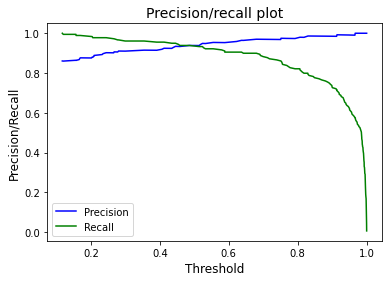

In [19]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_pred_probas=pipe_lr.predict_proba(X_test)[:, 1]
prc, rcl, thr = precision_recall_curve(y_test, y_pred_probas)

plt.title("Precision/recall plot", fontsize=14)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Precision/Recall", fontsize=12)
plt.plot(thr, prc[:-1], color='blue', label='Precision')
plt.plot(thr, rcl[:-1], color='green', label='Recall')
plt.legend()
plt.show()

**Problem 2** 
1. Run the code cell below to load data for this problem (do not make any changes to the content of the cell!). The code creates a new data frame `wine` with some wine data. The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [20]:
from sklearn.datasets import load_wine

data_wine=load_wine()
wine=pd.DataFrame(data=data_wine['data'], columns=data_wine['feature_names'])
wine['target']=data_wine['target']
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


2. Print to the screen the shape of the data frame.

In [21]:
wine.shape

(178, 14)

3. Print to the screen the column names of the `wine` data frame.

In [22]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

3. Demonstate that the target column contains three classes: 0, 1, and 2 (one class per cultivator); also, count the number of instances of each class (the count of unique values). *Hint:* you can do all this with a single Pandas function.

In [23]:
wine['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

4. Demonstrate that there are no missing values in the `wine` data frame.

In [24]:
wine.isna().sum().sum()

0

5. Preform a 70-30 split of the data set into a training set and a test set, stratifying on the target, and setting `random_state=42`.

In [25]:
X=wine.iloc[:, :-1]
y=wine.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

6. Build a two-step pipeline that applies the standard scaler to the features and then performs K-Nearest Neighbors classification (do not specify `n_neighbors`).

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipe_knn=Pipeline([
                   ('scaler', StandardScaler()), 
                   ('knn', KNeighborsClassifier())
                   ])

7. Use the training set to perform a 5-fold cross-validated grid search for the best number of nearest neighbors $K$ to be used in the pipeline created in the previous step. Explore the values of $K$ from 1 to 70 and set `scoring='f1_macro'` (so that you evaluate the performance based on the macro averaged F1 score).

In [27]:
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(pipe_knn, cv=5, param_grid={'knn__n_neighbors': np.arange(1, 71)}, scoring='f1_macro')

gs.fit(X_train, y_train)

gs.best_params_

{'knn__n_neighbors': 47}

8. Now use the fitted grid serach object from the previous step to make prediction on the test set. Compute the macro averaged F1 score for this predictions and print the result to the screen. *Hint:* set `average='macro'` when computing the macro averaged F1 score.

In [28]:
from sklearn.metrics import f1_score

y_pred_knn=gs.predict(X_test)
f1_knn=f1_score(y_test, y_pred_knn, average='macro')
print(f1_knn)

0.9657894736842105


9. Build another two-step pipeline that applies the standard scaler to the features and then performs a Softmax regression.

In [29]:
from sklearn.linear_model import LogisticRegression

pipe_lr=Pipeline([
                  ('scaler', StandardScaler()), 
                  ('lr', LogisticRegression())
                  ])

10. Fit the Softmax regression pipeline on the training data and make predictions on the test data; then compute the macro averaged F1 score and print it to the screen.

In [30]:
pipe_lr.fit(X_train, y_train)
y_pred_lr=pipe_lr.predict(X_test)
f1_lr=f1_score(y_test, y_pred_lr, average='macro')
print(f1_lr)

0.9828609096901779


What follows is not a part of the test, I am including it here just for illustration purposes.

In [31]:
cv_results=pd.DataFrame(gs.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003519,0.001771,0.003388,0.000833,1,{'knn__n_neighbors': 1},0.919778,0.921133,1.0,1.0,0.917714,0.951725,0.039431,51
1,0.003159,0.000724,0.003586,0.001453,2,{'knn__n_neighbors': 2},0.893557,0.836802,1.0,1.0,0.962848,0.938642,0.064062,54
2,0.002752,0.000662,0.003128,0.000315,3,{'knn__n_neighbors': 3},0.882202,0.960234,1.0,1.0,0.917714,0.952030,0.046310,50
3,0.002846,0.000592,0.003452,0.000770,4,{'knn__n_neighbors': 4},0.929630,0.921133,1.0,1.0,0.962848,0.962722,0.033479,26
4,0.003238,0.000880,0.003523,0.001250,5,{'knn__n_neighbors': 5},0.929630,0.960234,1.0,1.0,0.917714,0.961516,0.034348,32


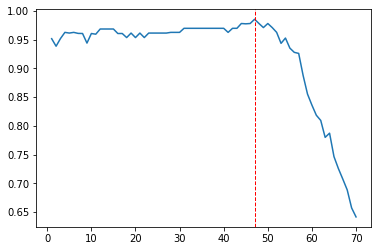

In [32]:
plt.plot(cv_results['param_knn__n_neighbors'], cv_results['mean_test_score'])
plt.axvline(x=gs.best_params_['knn__n_neighbors'], ls='--', linewidth=1, color='red')
plt.show()